# Simulation of noisy mutual inhibition
*Nhat Le, October 2017*

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [16]:
# Common parameters used for the entire file
param_dict = {'Wut': 6, 'Wvt': 6, 'Wuv': 6, 'Wvu': 6,
              'theta': 0.6, 'tau': 100, 'dt': 10}

In [4]:
def thresh_tanh(activity):
    '''Activation function for a neuron'''
    return 1 + np.tanh(activity)



def update_u_tanh(u, v, c1, dt):
    activation = u - (c1 * v) * dt
    #print(activation)
    return thresh_tanh(activation)

def update_v_tanh(u, v, c2, dt):
    activation = v - (c2 * u) * dt
    return thresh_tanh(activation)

def simulate_u_v_tanh(u_init, v_init, c1, c2, dt, niter):
    u_lst = []
    v_lst = []
    u = u_init
    v = v_init
    for i in range(niter):
        u = update_u_tanh(u, v, c1, dt)
        u_lst.append(u)
        v = update_v_tanh(u, v, c2, dt)
        v_lst.append(v)
    return u_lst, v_lst

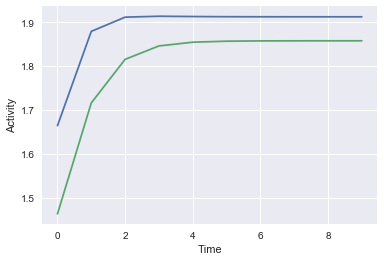

In [5]:
u1, v1 = simulate_u_v_tanh(1, 1, c1=2, c2=3, dt=0.1, niter=10)
plt.plot(u1)
plt.plot(v1);
plt.xlabel('Time')
plt.ylabel('Activity')

In [6]:
def thresh_exp(x):
    '''Activation function'''
    return 1 / (1 + np.exp(-x))

def update_u_exp(u, v, c1, c2, c3, theta, tau, dt, ext):
    '''u, v: activities of neurons u and v
    c1: weight of v to u
    c2: weight of u to v
    c3: weight of theta to u and v
    tau: time constant
    dt: time between updates
    ext: external input'''
    du = (-u + thresh_exp(c3 * theta - c1 * v + ext)) / tau * dt
    return u + du

def update_v_exp(u, v, c1, c2, c3, theta, tau, dt, ext):
    '''u, v: activities of neurons u and v
    c1: weight of v to u
    c2: weight of u to v
    c3: weight of theta to u and v
    tau: time constant
    dt: time between updates
    ext: external input'''
    dv = (-v + thresh_exp(c3 * theta - c2 * u + ext)) / tau * dt
    return v + dv

def simulate_u_v_exp(u_init, v_init, c1, c2, c3, theta, tau, niter, dt, uext=0, vext=0):
    u_lst = []
    v_lst = []
    u = u_init
    v = v_init
    for i in range(niter):
        u = update_u_exp(u, v, c1, c2, c3, theta, tau, dt, uext)
        #print('u = ', u)
        u_lst.append(u)
        v = update_v_exp(u, v, c1, c2, c3, theta, tau, dt, vext)
        #print('v = ', v)
        v_lst.append(v)
    return u_lst, v_lst

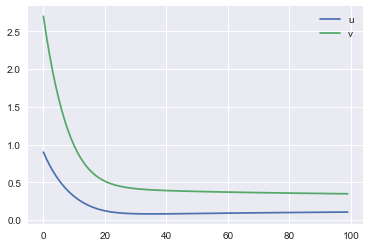

In [7]:
ulst, vlst = simulate_u_v_exp(1, 3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=100, dt=10)
plt.plot(ulst, label='u')
plt.plot(vlst, label='v')
plt.legend()

In [8]:
ustarts = np.linspace(0, 1, 11)
vstarts = np.linspace(0, 1, 11)
uends_1 = np.zeros((len(ustarts), len(vstarts)))
vends_1 = np.zeros((len(ustarts), len(vstarts)))

uends_10 = np.zeros((len(ustarts), len(vstarts)))
vends_10 = np.zeros((len(ustarts), len(vstarts)))

uends_100 = np.zeros((len(ustarts), len(vstarts)))
vends_100 = np.zeros((len(ustarts), len(vstarts)))

uends_1000 = np.zeros((len(ustarts), len(vstarts)))
vends_1000 = np.zeros((len(ustarts), len(vstarts)))

for idu, u in enumerate(ustarts):
    for idv, v in enumerate(vstarts):
        ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=0.5,
                                      tau=100, niter=1, dt=10)
        uends_1[idu, idv] = ulst[-1]
        vends_1[idu, idv] = vlst[-1]
        
        ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=0.5,
                                      tau=100, niter=10, dt=10)
        uends_10[idu, idv] = ulst[-1]
        vends_10[idu, idv] = vlst[-1]
        
        ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=0.5,
                                      tau=100, niter=100, dt=10)
        uends_100[idu, idv] = ulst[-1]
        vends_100[idu, idv] = vlst[-1]
        
        ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=0.5,
                                      tau=100, niter=1000, dt=10)
        uends_1000[idu, idv] = ulst[-1]
        vends_1000[idu, idv] = vlst[-1]

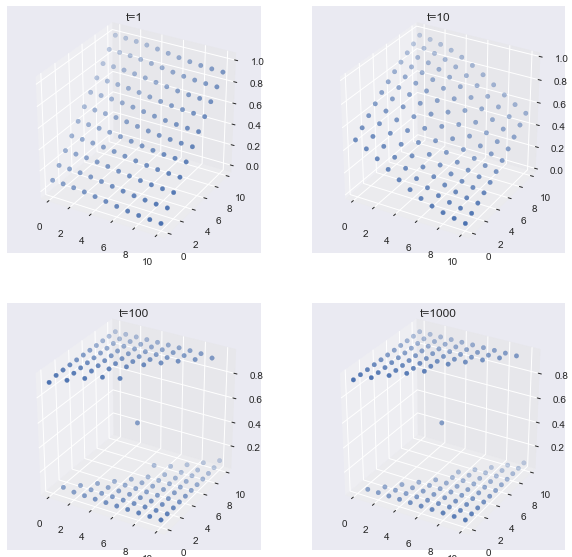

In [9]:
x,y = np.meshgrid(range(11),range(11))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_1.ravel())
ax.set_title('t=1')

ax = fig.add_subplot(222, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_10.ravel())
ax.set_title('t=10')

ax = fig.add_subplot(223, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_100.ravel())
ax.set_title('t=100')

ax = fig.add_subplot(224, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_1000.ravel())
ax.set_title('t=1000')

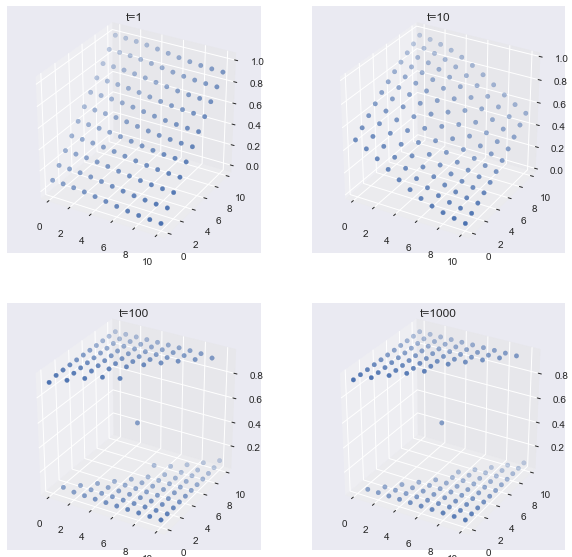

In [10]:
x,y = np.meshgrid(range(11),range(11))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_1.ravel())
ax.set_title('t=1')

ax = fig.add_subplot(222, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_10.ravel())
ax.set_title('t=10')

ax = fig.add_subplot(223, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_100.ravel())
ax.set_title('t=100')

ax = fig.add_subplot(224, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_1000.ravel())
ax.set_title('t=1000')

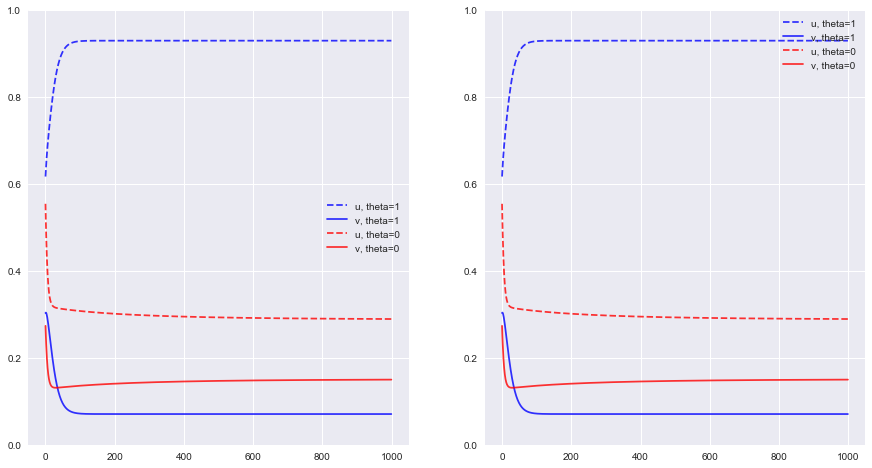

In [11]:
# The effect of theta on the fixed points
ulst, vlst = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=1000, dt=10)

ulst1, vlst1 = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0.5,
                              tau=100, niter=1000, dt=10)
ulst2, vlst2 = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=1000, dt=10)

ulst1b, vlst1b = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0.5,
                              tau=100, niter=1000, dt=10)
ulst2b, vlst2b = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=1000, dt=10)


fig,ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].plot(ulst1, '--', color='blue', alpha=0.8, label='u, theta=1')
ax[0].plot(vlst1, color='blue', alpha=0.8, label='v, theta=1')
ax[0].plot(ulst2, '--', color='red', alpha=0.8, label='u, theta=0')
ax[0].plot(vlst2 , color='red', alpha=0.8, label='v, theta=0')


ax[0].set_ylim(0,1)
ax[0].legend();

ax[1].plot(ulst1b, '--', color='blue', alpha=0.8, label='u, theta=1')
ax[1].plot(vlst1b, color='blue', alpha=0.8, label='v, theta=1')
ax[1].plot(ulst2b, '--', color='red', alpha=0.8, label='u, theta=0')
ax[1].plot(vlst2b, color='red', alpha=0.8, label='v, theta=0')


ax[1].set_ylim(0,1)
ax[1].legend(loc='upper right');

## Add a 'Set' signal

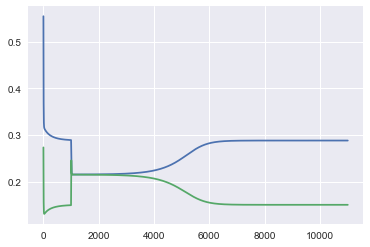

In [12]:
ulst, vlst = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=1000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp(ulst[-1], vlst[-1], c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=10, dt=10, vext=0.75)
ulst_relax, vlst_relax = simulate_u_v_exp(ulst_set[-1], vlst_set[-1], c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=10000, dt=10)
plt.plot(ulst + ulst_set + ulst_relax)
plt.plot(vlst + vlst_set + vlst_relax);


In [13]:
ulst_set

[0.28922413618229298,
 0.28774079149175552,
 0.28509383924488285,
 0.2815304678470345,
 0.27724444772463769,
 0.27238835346272094,
 0.26708290305959231,
 0.26142413585925256,
 0.25548895651784165,
 0.24933943324051705]

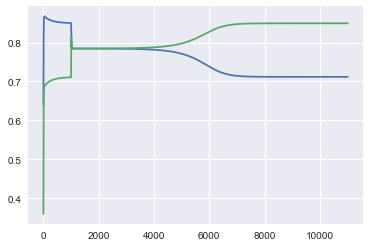

In [14]:
ulst, vlst = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=1000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp(ulst[-1], vlst[-1], c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=10, dt=10, vext=0.865)
ulst_relax, vlst_relax = simulate_u_v_exp(ulst_set[-1], vlst_set[-1], c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=10000, dt=10)
plt.plot(ulst + ulst_set + ulst_relax)
plt.plot(vlst + vlst_set + vlst_relax);

In [13]:
ulst, vlst = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=4000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp(ulst[-1], vlst[-1]+0.13, c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=8000, dt=10)


In [14]:
np.random.normal(size=10)

array([ 0.28264413,  0.26099661, -0.95694863,  1.45838268, -0.08250176,
        0.16567515,  0.74684782,  0.48910746,  1.02573564,  0.42084592])

In [15]:
def update_u_exp_noise(u, v, c1, c2, c3, theta, tau, dt):
    '''Update neuron u given a noise that is ~N(0, s^2)'''
    noise = np.random.normal(scale=0.01, size=len(u))
    du = (-u + thresh_exp(c3 * theta - c1 * v) + noise) / tau * dt
    return u + du

def update_v_exp_noise(u, v, c1, c2, c3, theta, tau, dt):
    '''Update neuron v given a noise that is ~N(0, s^2)'''
    noise = np.random.normal(scale=0.01, size=len(v))
    dv = (-v + thresh_exp(c3 * theta - c2 * u) + noise) / tau * dt
    return v + dv

def simulate_u_v_exp_noise(u_init, v_init, c1, c2, c3, theta, tau, niter, dt):
    u_lst = []
    v_lst = []
    u = u_init
    v = v_init
    for i in range(niter):
        u = update_u_exp_noise(u, v, c1, c2, c3, theta, tau, dt)
        #print('u = ', u)
        u_lst.append(u)
        v = update_v_exp_noise(u, v, c1, c2, c3, theta, tau, dt)
        #print('v = ', v)
        v_lst.append(v)
    return u_lst, v_lst

In [16]:
ulst[-1]

0.84931783742864475

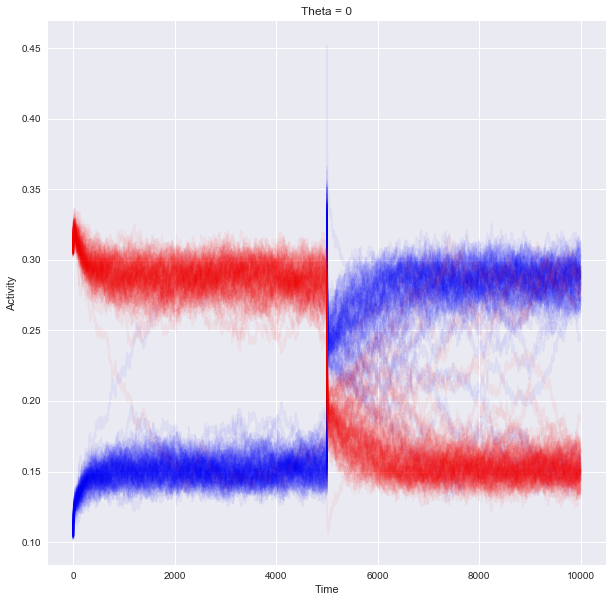

In [17]:
u = np.array([0.1] * 100)
v = np.array([0.3] * 100)
plt.figure(figsize=(10, 10))
ulst, vlst = simulate_u_v_exp_noise(u, v, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=5000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp_noise(ulst[-1]+0.2, vlst[-1], c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=5000, dt=10)


U = np.vstack(ulst + ulst_set)
plt.plot(U, 'blue', alpha=0.05, label='u');

V = np.vstack(vlst + vlst_set)
plt.plot(V, 'red', alpha=0.05, label='v');
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Theta = 0')

#plt.legend();

In [18]:
U.shape

(10000, 100)

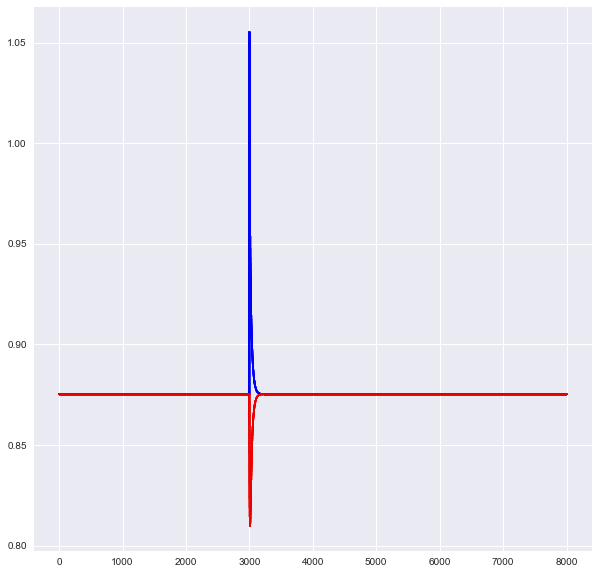

In [19]:
u = np.array([0.1] * 100)
v = np.array([0.3] * 100)
plt.figure(figsize=(10, 10))
ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=1.2,
                              tau=100, niter=5000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp(ulst[-1]+0.2, vlst[-1], c1=6, c2=6, c3=6, theta=1.2,
                              tau=100, niter=5000, dt=10)


U = np.vstack(ulst + ulst_set)
plt.plot(U[2000:, :], 'blue', alpha=0.05, label='u');

V = np.vstack(vlst + vlst_set)
plt.plot(V[2000:, :], 'red', alpha=0.05, label='v');
#plt.ylim(0.9, 1.2)
#plt.legend();

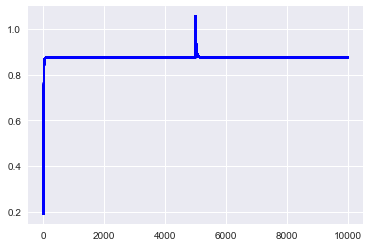

In [20]:
plt.plot(U, 'blue');

In [ ]:
def compute_path_integral(start_pt, end_pt):
    